# 딥러닝 학습기술

* optimization (매개변수 갱신(확률적 경사하강법, 모멘텀, AdaGrad, Adam))
* weight decay
* batch normalization
* 과대적합 (overfitting) / 과소적합 (underfitting)
* 규제화 (regularization)
* 드롭아웃 (drop out)
* 하이퍼 파라미터
    * 학습률 (learning rate)
    * 학습횟수
    * 미니배치 크기

## 최적화 방법 : 매개변수 갱신
### 확률적 경사하강법 (Stochastic Gradient Descent, SGD)
* 전체를 한번에 갱신하지 않고, 확률적으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정
* 반복될때마다 다루는 데이터의 수가 적기 때문에 한 번 처리하는 속도는 빠름
* 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
* 확률적이기 때문에, 배치 경사하강법보다 불안정
* 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
* 따라서, 위와 같은 문제 때문에 미니배치 경사하강법으로 학습을 진행<br>요즘에는 보통 SGD라고하면 미니배치 경사하강법을 의미하기도함.
* (참고)
    * 배치 경사하강법
    * 미니 배치 경사하강법
    * 확률적 경사하강법
    * 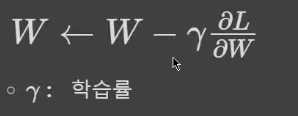
* 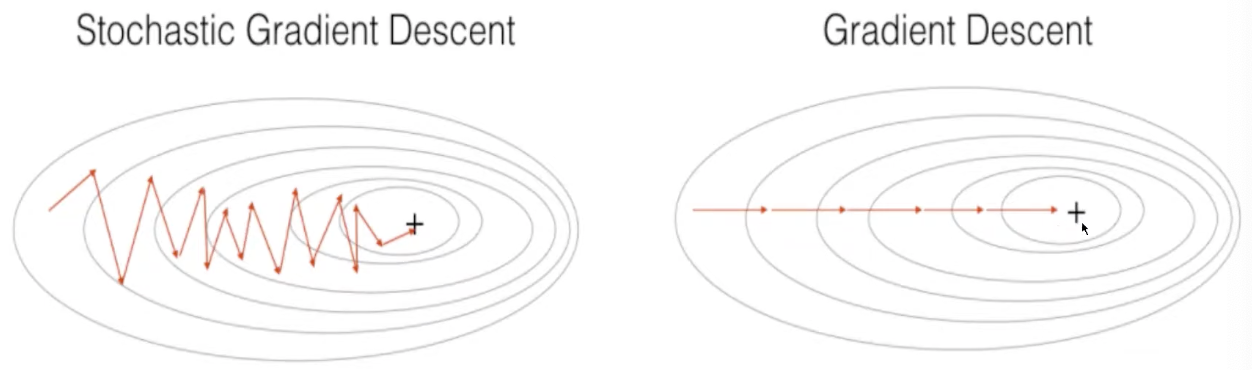

In [57]:
class SGD():
    def __init__(self,learning_rate = 0.01):
        self.learning_rate = learning_rate
        
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.learning_rate*grads[key]
            
    

In [4]:
optimizer = SGD()
for i in range(100000):
    optimizer.update(params,grads)
    
#이런식으로 동작한다.

NameError: name 'learning_rate' is not defined

## SGD의 단점
* 단순하지만, 문제에 따라서 시간이 매우오래걸림
* 요동치면서 움직이기 때문에

## 모멘텀 (Momentum)
* 운동량을 의미, 관성과 관련
* 공이 그릇의 경사면을 따라서 내려가는 듯한 모습
* 이전의 속도를 유지하려는 성질 <br>경사하강을 좀 더 유지하려는 성격을 지님
* 단순히 SGD만 사용하는 것보다 적게 방향이 변함
* 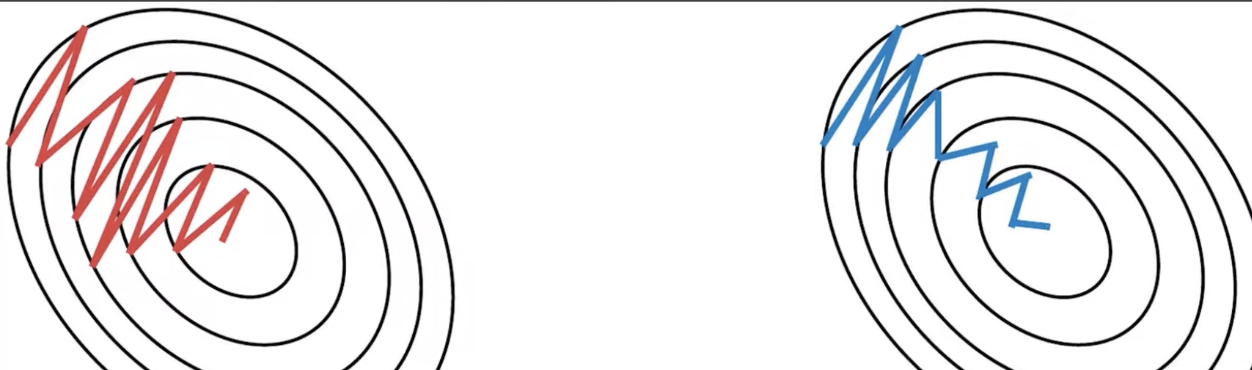
* 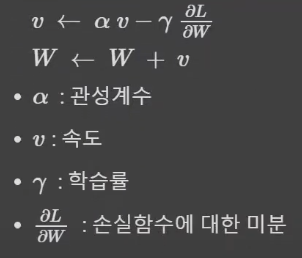

In [5]:
class Momentum():
    def __init__(self,learning_rate=0.01,momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
        
    def update(self,params, grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.v[key]

## AdaGrad(Adaptive Gradient)
* 가장 가파른 경사를 따라 빠르게 하강하는 방법
* 적응적 학습률이라고도 함 학습률을 변화시키며 진행
* 경사가 급할때는 빠르게 변화, 완만할 때는 느리게 변화
* 간단한 문제에서는 좋을 수는 있지만 딥러닝에서는 자주 쓰이지 않음 학습률이 너무 감소되어 전역 최소값에 도달하기 전에 학습이 종료될 수 있기 때문
* 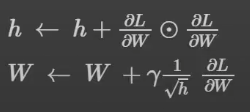
* 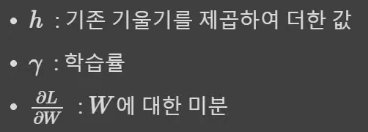
* 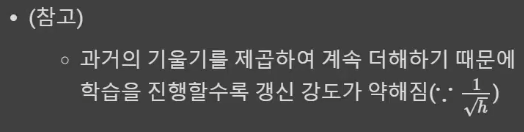

In [6]:
class AdaGrad:
    def __init__(self,learning_rate = 0.01):
        self.learning_rate =  learning_rate
        self.h = None
    def update(self,params, grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key]+=grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
    

## RMSProp (Root Mean Square Propagation)
* AdaGrad를 보완하기 위한 방법으로 등장
* 합 대신 지수의 평균값을 활용
* 학습이 안되기 시작하면 학습률이 커져 잘 되게끔하고, 학습률이 너무 크면 학습률을 다시 줄임
* 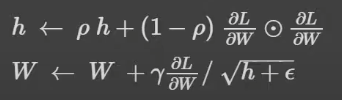
* 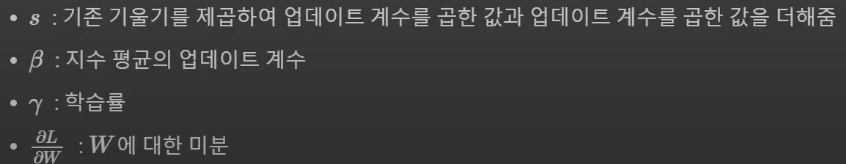

In [7]:
class RMSProp:
    def __init__(self,learning_rate=0.01,decay_rate=0.99):
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.h = None
    
    def update(self,params,grads):
        if self.h in None:
            self.h={}
            for key,val in params.keys():
                self.h[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.h[key] *= self.decay_rate
                self.h[key] += (1-self.decay_rate) * grads[key] * grads[key]
                params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## Adam (Adaptive moment estimation)
* 모멘텀 최적화와 RMSProp의 아이디어를 합친 것
* 지난 그래디언트의 지수 감소평균을 따르고(Momentum), 지난 그래디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
* 가장 많이 사용되는 최적화 방법
* 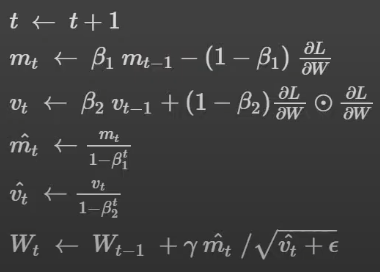
* 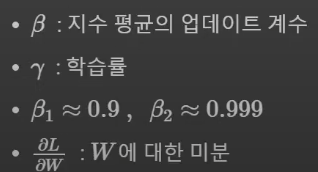

In [8]:
class Adam():
    def __init__(self,learning_rate=0.01,beta1=0.9,beta2=0.999):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter=0
        self.m=None
        self.v=None
        
    def update(self,params,grads):
        if self.m is None:
            self.m,self.v = {},{}
            for key,val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter+=1
        learning_rate_t = self.learning_rate * np.sqrt(1.0-self.beta2**self.iter) / (1.0-self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1-self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1-self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= learning_rate_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

* 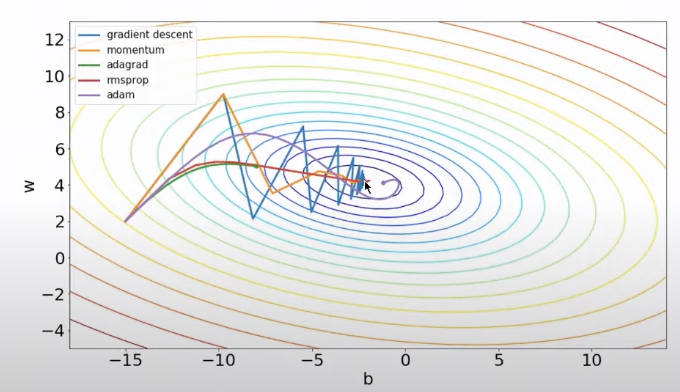

## Gradient Vanishing
* 활성화함수가 Sigmoid함수일 때, 은닉층의 갯수가 늘어날수록 가중치가 역전파되면서 가중치 소실문제 발생
    * 0~1 사이의 값으로 출력되면서 0 또는 1에 가중치 값이 퍼짐 이는 미분값이 점점 0에 가까워짐을 의미하기도 한다.
    * ReLU함수 등장 (비선형 함수)
* 가중치 초기화 문제 (은닉층의 활성화값 분포)
    * 가중치의 값이 일부 값으로 치우치게되면 활성화함수를 통과한 값이 치우치게되고, 표현할수있는 신경망의 수가 적어짐.
    * 따라서, 활성화값이 골고루 분포되는 것이 중요
* 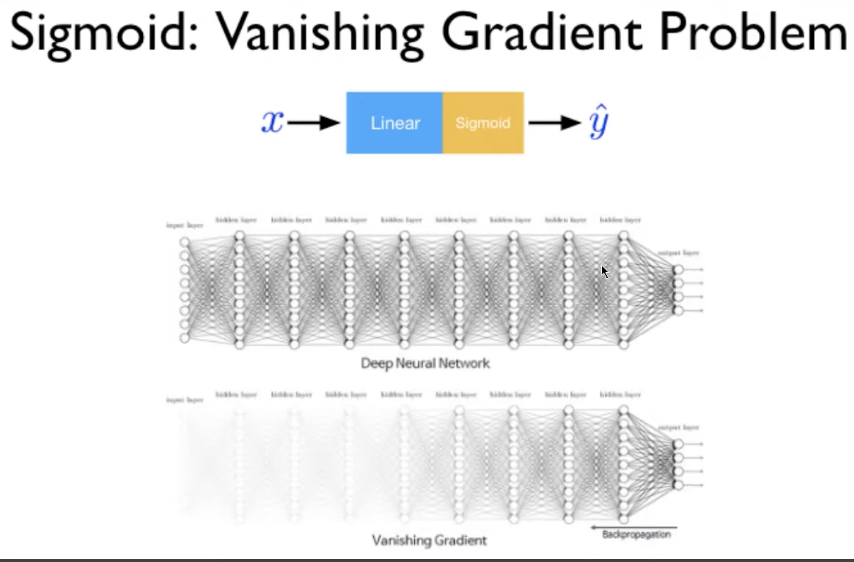

## 가중치 초기화
* 0이면 학습이 안된다.
* too small : 느리지만 학습이 진행된다.
* too large : 팍팍 튄다. 학습이 잘 안된다.
* 적절하게 : 바로 학습이 진행된다.


### 초기값 : 0
* 학습이 올바르게 진행되지 않음
* 0으로 설정하면 오차역전파버베서 모든 가중치의 값이 똑같이 갱신됨

In [9]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.zeros((nodes,nodes))
    a = np.dot(x,w)
    z = sigmoid(a)
    activation_values[i] = z
    

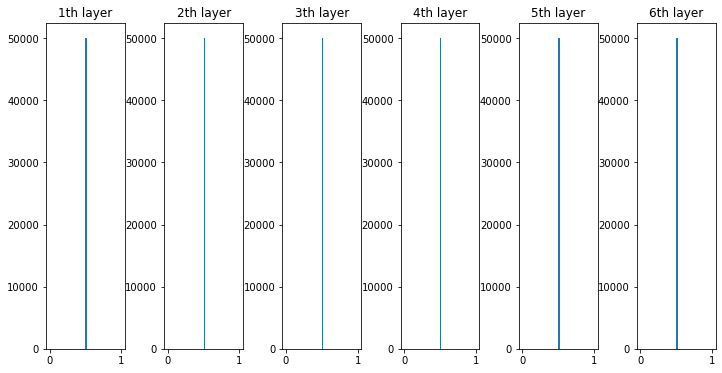

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 균일하게 분포하지않는다.

### 균일값 분포
* 활성화값이 균일하지 않음 (활성화함수 : sigmoid)
* 역전파로 전해지는 기울기값이 사라짐

In [11]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.uniform(1,10,(nodes,nodes))
    a = np.dot(x,w)
    z = sigmoid(a)
    activation_values[i] = z
    

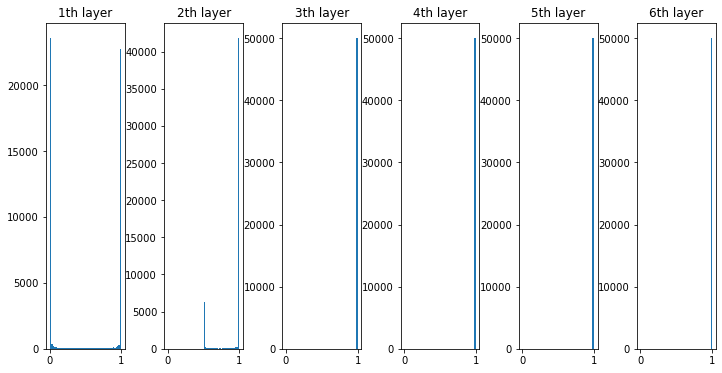

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

#분포가 되긴되는데 뒤로 갈 수록 한쪽으로 쏠린다.

### 정규분포 (nomalization)
* 활성화함수를 통과하면 양쪼그로 퍼짐
* 0과 1에 퍼지면서 기울기 소실문제(gradient vanishing) 발생

In [13]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes)
    a = np.dot(x,w)
    z = sigmoid(a)
    activation_values[i] = z

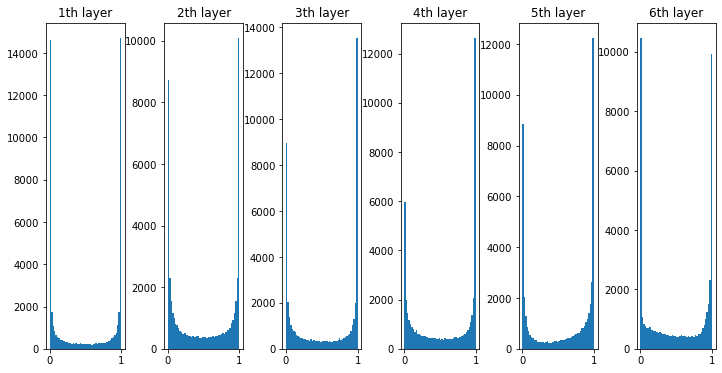

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

#조금 나아짐 
#그래도 아직 0과 1에 치우쳐져있음 -> 양쪽으로 퍼짐

### 아주 작은 정규분포값으로 가중치 초기화
* 0과 1로 퍼지지는 않았고, 한곳에 치우쳐짐
* 해당 신경망이 표현할 수 있는 문제가 제한됨

In [15]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activation_values[i] = z

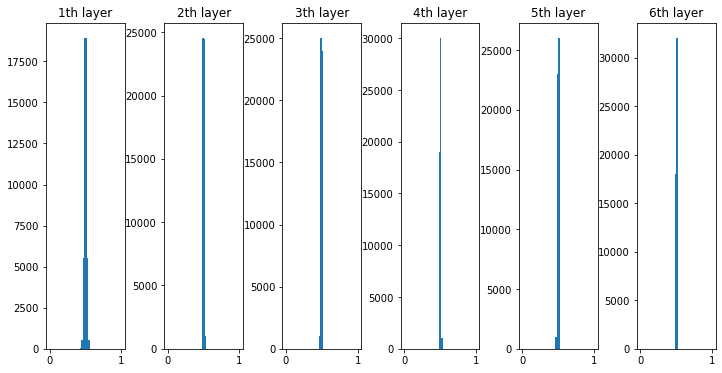

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

#0과 1로 퍼지지는 않았지만 가운데로 치우쳐진 결과가 나온다.

### Xavier (Glorot)
* 은닉층의 노드의 수가 n이라면 표준편차가 1/루트 n 인 분포
* 더 많은 가중치에 역전파가 전달가능하고, 비교적 많은 문제를 표현할 수 있음
* 활성화함수가 선형인 함수일 때 매우 적합

In [17]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) / np.sqrt(nodes)
    a = np.dot(x,w)
    z = sigmoid(a)
    activation_values[i] = z

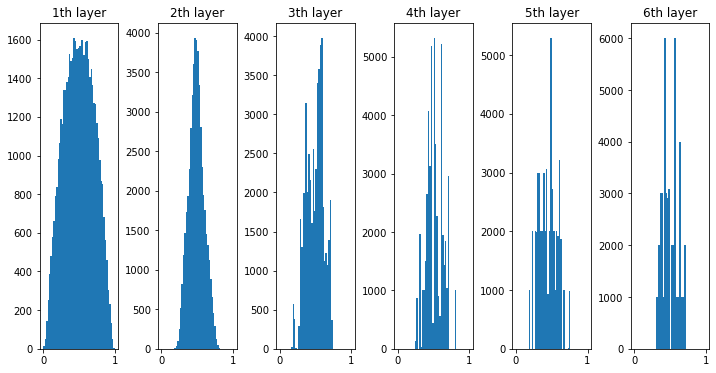

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

#골고루 퍼진것을 확인할 수 있다.

### Xavier (Golort) - tanh
* 활성화함수 : tanh
* sigmoid함수보다더 깔끔한 종모양으로 분포


In [19]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) / np.sqrt(nodes)
    a = np.dot(x,w)
    z = tanh(a)
    activation_values[i] = z

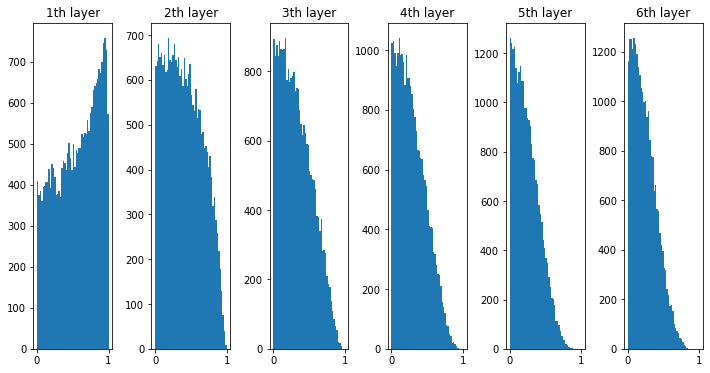

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 분포가 훨씬 더 퍼진 형태를 확인할수잇다.

## 비선형 함수에서의 가중치 초기화

### 초기값 :  0
* 활성화 함수 : ReLU

In [21]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

def ReLU(x):
    return np.maximum(0,x) # 0이상일 경우 x, 아닐경우는 0

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.zeros((nodes,nodes))
    a = np.dot(x,w)
    z = ReLU(a)
    activation_values[i] = z

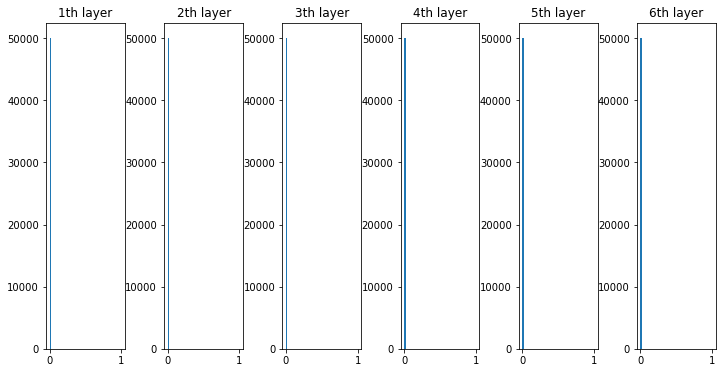

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 그대로 0인 것을 확인할 수 있다.

### 정규분포  (normalization)
* 활성화함수 : ReLU

In [23]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

def ReLU(x):
    return np.maximum(0,x) # 0이상일 경우 x, 아닐경우는 0

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes)
    a = np.dot(x,w)
    z = ReLU(a)
    activation_values[i] = z

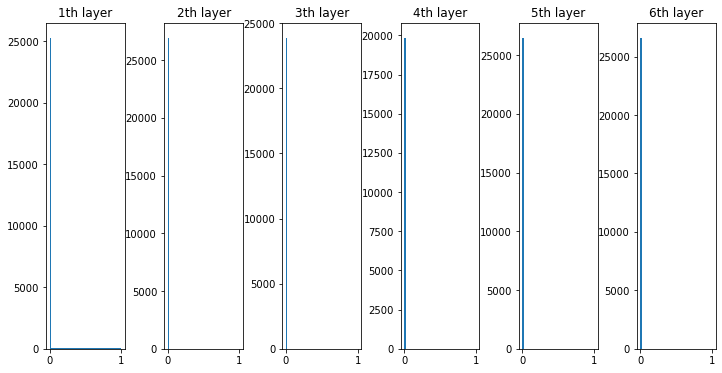

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 별 다른 것 없이 나오는 것을 확인할 수 있다.

### 표준편차가 0.01일 떄

In [25]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

def ReLU(x):
    return np.maximum(0,x) # 0이상일 경우 x, 아닐경우는 0

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) * 0.01
    a = np.dot(x,w)
    z = ReLU(a)
    activation_values[i] = z

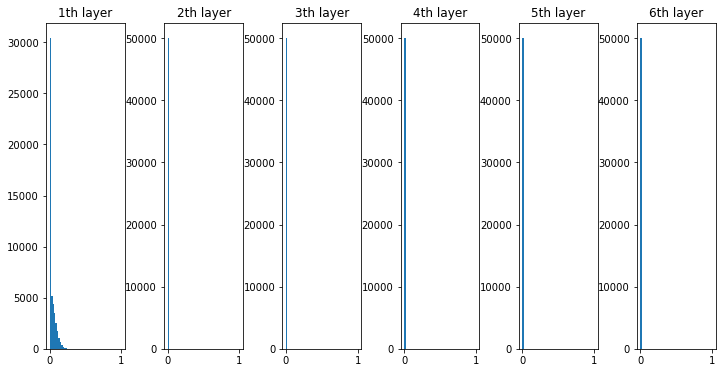

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 반영이 되었지만 아직도 좋지 않은 결과

### Xavier (Glorot)

In [27]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

def ReLU(x):
    return np.maximum(0,x) # 0이상일 경우 x, 아닐경우는 0

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) / np.sqrt(nodes)
    a = np.dot(x,w)
    z = ReLU(a)
    activation_values[i] = z

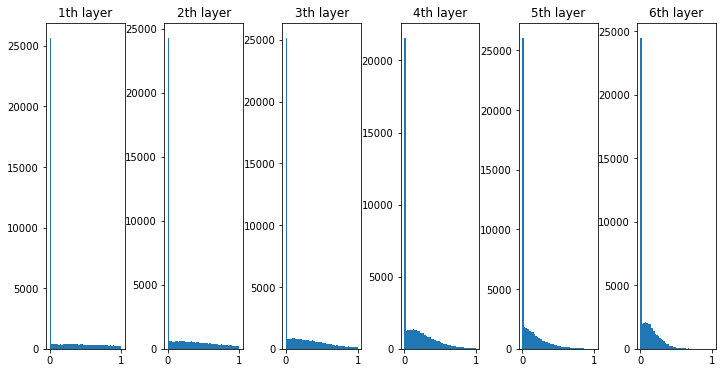

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 분포값이 너무 적은 것을 알수있다.

### 초기값 : He
* 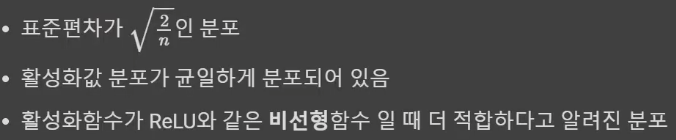

In [29]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) +  np.exp(-x))

def ReLU(x):
    return np.maximum(0,x) # 0이상일 경우 x, 아닐경우는 0

x = np.random.randn(1000,50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
        
    w = np.random.randn(nodes,nodes) * np.sqrt(2/nodes)
    a = np.dot(x,w)
    z = ReLU(a)
    activation_values[i] = z

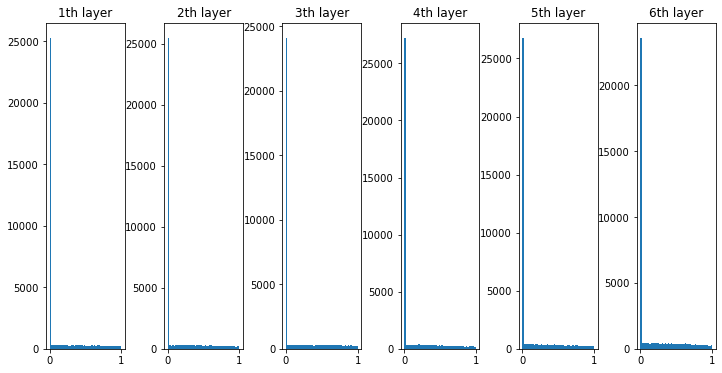

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i,a in activation_values.items():
    plt.subplot(1,len(activation_values),i+1)
    plt.title(str(i+1) +  'th layer')
    plt.hist(a.flatten(),50,range=(0,1))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    
plt.show()

# 좀더 퍼져서 분포하는 것을 확인할 수 있다.

## 배치 정규화 (Batch Normalization)
* 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적응시키는 것
* 미니배치 단위로 데이터의 평균이 0, 표준편차가 1로 정규화
* 학습을 빨리 진행할 수 있음
* 초기값에 크게 의존하지 않아도 됨
* 과적합을 방지
* 보통 Fully-Connected와 활성화함수(비선형)사이에 놓임
* 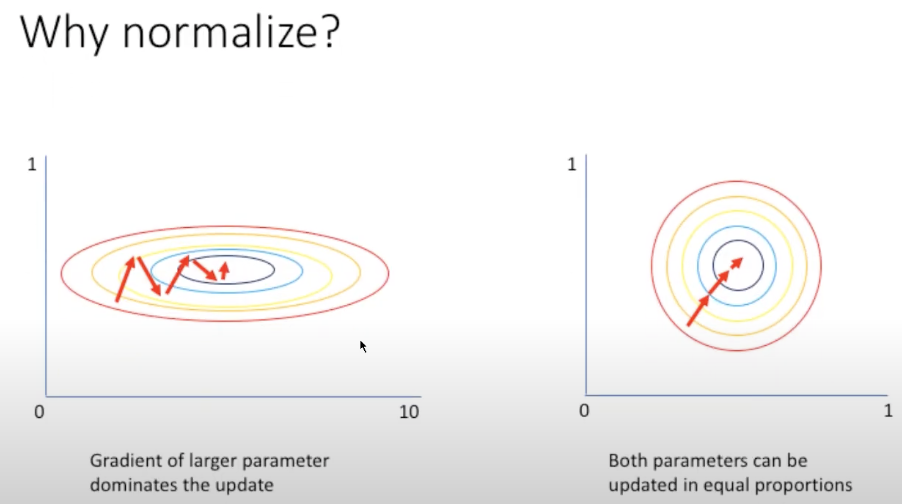

In [163]:
class BatchNormalization():
    def __init__(self,gamma, beta, momentum=0.9,running_mean=None,running_var=None):
        self.gamma = gamma
        self.momentum = momentum
        self.beta = beta
        self.input_shape = None
        self.running_mean = running_mean
        self.running_var = running_var
        
        self.batch_size  = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None
        
    def forward(self,input_data,is_train = True):
        self.input_shape = input_data.shape
        if input_data.ndim != 2:
            N,C,H,W = input_data.shape
            input_data = input_data.reshape(N,-1)
            
        out = self.__forward(input_data,is_train)
        
        return out.reshape(*self.input_shape)
    
    def __forward(self,input_data,is_train):
        if self.running_mean is None:
            N,D = input_data.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
            
        if is_train:
            mu = input_data.mean(axis=0)
            xc = input_data - mu
            var = np.mean(xc**2,axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc/std
            
            self.batch_size = input_data.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1.0-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1.0-self.momentum) * var
        else:
            xc = input_data - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        
        out = self.gamma * xn + self.beta
        return out
    
    def backward(self,dout):
        if dout.ndim!=2:
            N,C,H,W = dout.shape
            dout = dout.reshape(N,-1)
            
        dx = self.__backward(dout)
        
        dx = dx.reshape(*self.input_shape)
        return dx
    
        
    def __backward(self,dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout,axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std),axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc,axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx
        
        
        
        

## 과대적합(overfitting) / 과소적합 (underfitting)
* 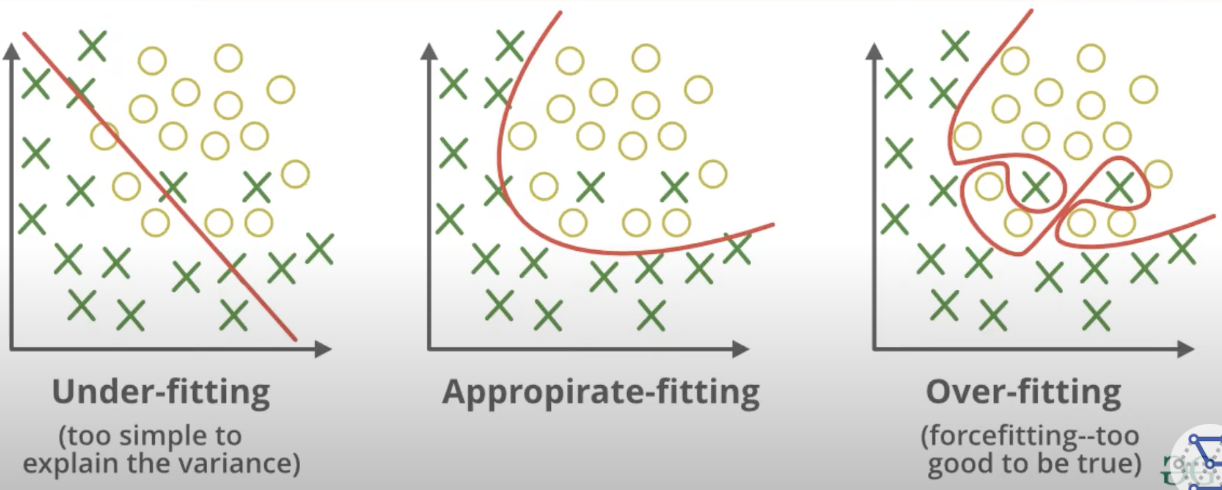

### 과대적합 (overfitting)
* 모델이 학습 데이터에 한에서만 좋은 성능을 보이고 새로운 데이터에는 그렇지 못한경우
* 학습데이터가 매우 적을 경우
* 모델이 지나치게 복잡한 경우
* 학습 횟수가 매우 많을 경우
<br>
* 해결방안
    * 학습 데이터를 다양하게 수집
    * 모델을 단순화
        * 파라미터가 적은 모델을 선택하거나, 학습데이터의 특성 수를 줄이거나
    * 정규화 (Regularization)을 통한 규칙을 단순화
    * 적정한 하이퍼 파라미터 찾기

### 과소적합 (underfitting)
* 학습데이터를 충분히 학습하지 않아 성능이 매우 안좋을 경우
* 모델이 지나치게 단순한 경우
<br>
* 해결방안
    * 충분한 학습 데이터 수집
    * 보다 더 복잡한 모델
    * epoch을 늘려 충분히 학습

## 규제화 (Regularization)
* 과대적합 (overfitting)을 방지하는 방법 중 하나
* 과대적합은 가중치의 매개변수 값이 커서 발생하는 경우가 많음<br>이를 방지하기 위해 큰 가중치 값에 큰 규제를 가하는 것
* 규제란 가중치의 절댓값을 가능한 작게 만드는 것으로, 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것 (기울기를 작게 만드는 것)을 의미한다. 즉, 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
* 적절한 규제값을 찾는 것이 중요

### L2 규제
* 가중치의 제곱합
* 손실함수일정 값을 더함으로써 과적합을 방지
* 람다 값이 크면 가중치 감소가 커지고 작으면 규제가 작아진다.
* 더 Robust한 모델을 생성하므로 L1보다 많이 사용됨
* 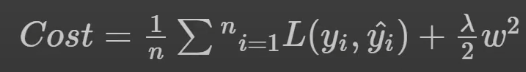
* 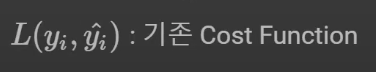

In [164]:
def loss(x,true_y):
    
    weight_decay += 0.5 * weight_decay_lambda * np.sum(w**2)
    return weight_decay

### L1 규제
* 가중치의 절대값 합
* L2규제와 달리 어떤 가중치는 0이 되는데 이는 모델이 가벼워짐을 의미
* 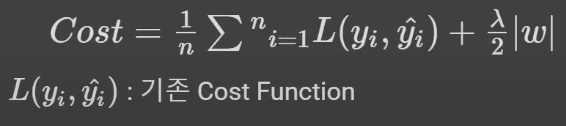

In [165]:
def loss(x,true_y):
    
    weight_decay += 0.5 * weight_decay_lambda * np.sum(np.abs(w))
    return weight_decay

## 드롭아웃 (drop out)
* 과적합을 방ㅇ지하기 위한 방법
* 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용
* 보통 ratio_value는 0.5 또는 0.7
* 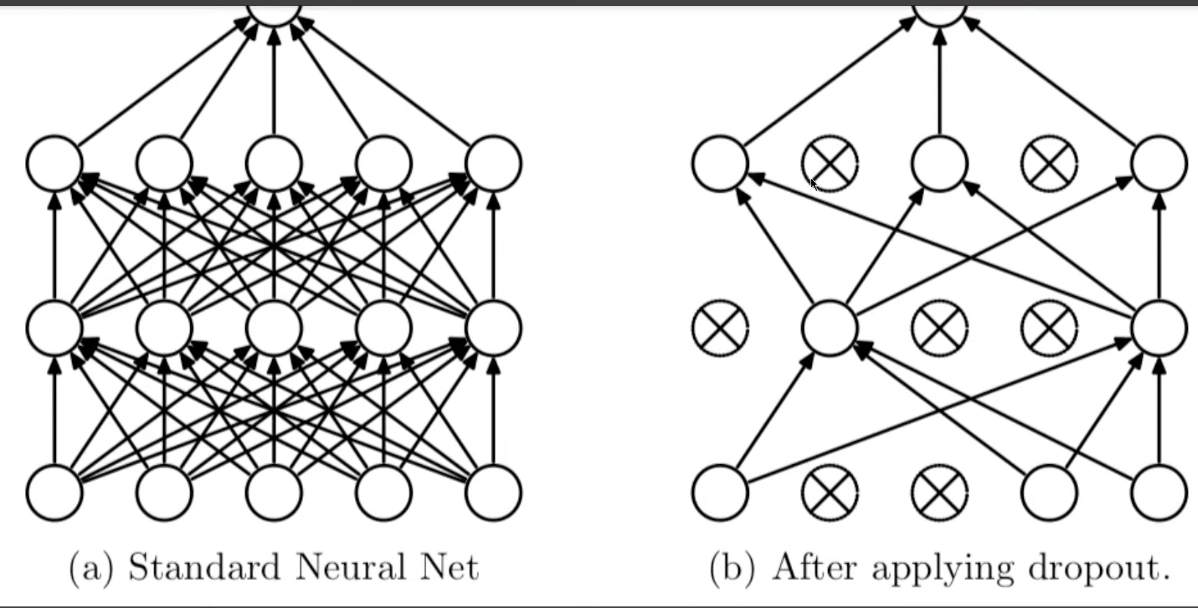

In [166]:
class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self,input_data,is_train=True):
        if is_train:
            self.mask = np.random.rand(*input_data.shape) > self.dropout_ratio
            return input_data  * self.mask
        else:
            input_data * (1.0 - self.dropout_ratio)
            
    def backward(self,dout):
        return dout * self.mask

## 하이퍼 파라미터

### 학습률 (learning rate)
* 적절한 학습률에 따라 학습정도가 달라짐
* 적당한 학습률을 찾는 것이 핵심

### 학습 횟수 (epoch)
* 학습 횟수를 너무 적게, 또는 너무 크게 지정하면 과소적합 또는 과대적합을 띈다.
* 몇번씩 진행하면서 최적의 epochs값을 찾아야한다.


### 미니배치 크기
* 미니배치 학습
    * 한번 학습할 때 메모리의 부족현상을 막기 위해 전제 데이터의 일부를 여러번 학습하는 방식
* 한번 학습 할 때 마다 얼마만큼의 미니배치 크기를 사용할지 결정
* 배치 크기가 작을수록 학습 시간이 많이 소요되고, 클수록 학습 시간은 적게 소요된다.

### 검증데이터 (Validation data)
* 주어진 데이터를 학습 + 검증 + 테스트 데이터로 구분하여 과적합을 방지
* 일반적으로 전체데이터의 2~30%를 테스트데이터,<br>
나머지에서 20%정도를 검증용데이터<br>
남은 부분을 학습용 데이터로 사용
* 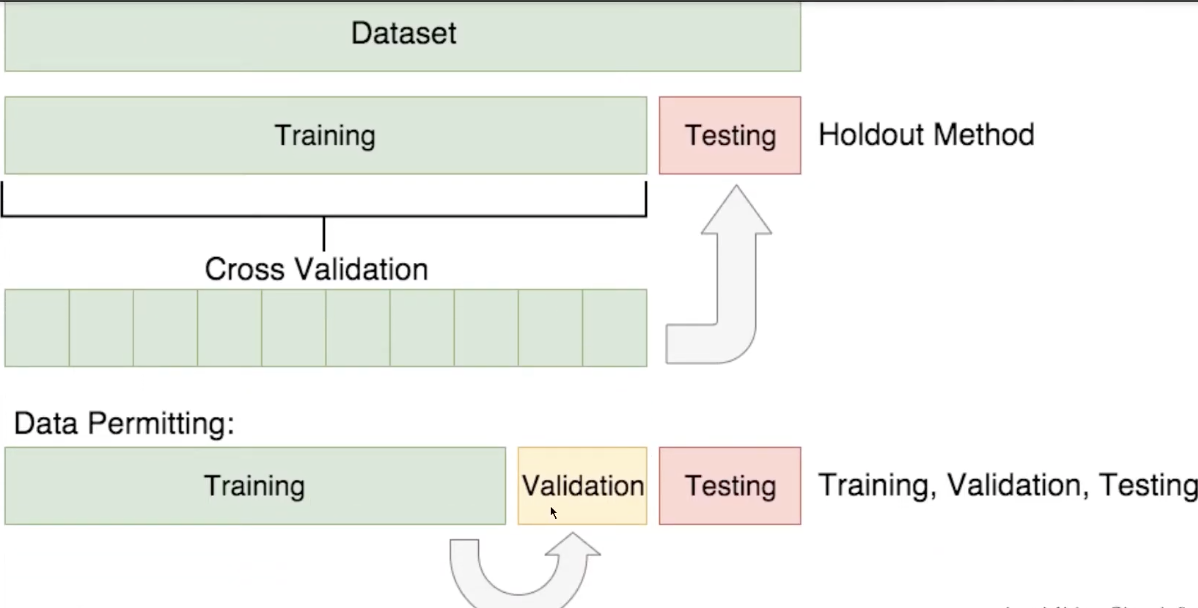

## MNIST 분류

### module import

In [167]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

### 데이터 로드


In [198]:
np.random.seed(42)
mnist=  tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
num_classes = 10

### 전처리

In [199]:

x_train =  x_train[:10000]
x_test = x_test[:3000]

y_train = y_train[:10000]
y_test = y_test[:3000]

In [200]:
x_train,x_test = x_train.reshape(-1,28*28).astype(np.float32),x_test.reshape(-1,28*28).astype(np.float32)

x_train = x_train/.256
x_test = x_test/.256

y_train = np.eye(num_classes)[y_train] #원핫벡터로 바꿔주는

In [201]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(10000, 784)
(10000, 10)
(3000, 784)
(3000,)


In [202]:
epochs = 1000
learning_rate = 1e-2
batch_size = 256
train_size = x_train.shape[0]
iter_per_epoch = max(train_size/batch_size,1)


In [203]:
def softmax(x):
    if x.ndim ==2:
        x = x.T
        x = x - np.max(x,axis=0)
        y = np.exp(x) / np.sum(np.exp(x),axis=0)
        return y.T
    
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


def mean_squeared_error(y,t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(pred_y,true_y):
    if pred_y.ndim==1:
        true_y = true_y.reshape(1,true_y.size)
        pred_y = pred_y.reshape(1,pred_y.size)
        
    if true_y.size == pred_y.size:
        ture_y = true_y.argmax(axis=1)
        
    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size),true_y] + 1e-7)) / batch_size

In [204]:
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self,input_data):
        self.mask=(input_data<=0)
        out = input_data.copy()
        out[self.mask] = 0
        return out
    
    def backward(self,dout):
        dout[self.mask] = 0
        dx = dout
        return dx
    

In [205]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self,input_data):
        out = 1/(1+np.exp(-input_data))
        self.out = out
        return out
    
    def backward(self,dout):
        dx = dout * (1.0 - self.out) * self.dout
        return dx

In [206]:
class Layer:
    def __init__(self,W,b):
        self.W = W
        self.b = b
        
        self.input_data = None
        self.input_data_shape = None
        
        self.dW = None
        self.db = None
        
    def forward(self,input_data):
        self.input_data_shape = input_data.shape
        
        input_data = input_data.reshape(input_data.shape[0],-1)
        self.input_data = input_data
        out = np.dot(self.input_data,self.W) + self.b
        
        return out
    
    def backward(self,dout):
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.input_data.T,dout)
        self.db = np.sum(dout,axis=0)
        
        dx = dx.reshape(*self.input_data_shape)
        return dx
    
        

In [207]:
class BatchNormalization():
    def __init__(self,gamma, beta, momentum=0.9,running_mean=None,running_var=None):
        self.gamma = gamma
        self.momentum = momentum
        self.beta = beta
        self.input_shape = None
        self.running_mean = running_mean
        self.running_var = running_var
        
        self.batch_size  = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None
        
    def forward(self,input_data,is_train = True):
        self.input_shape = input_data.shape
        if input_data.ndim != 2:
            N,C,H,W = input_data.shape
            input_data = input_data.reshape(N,-1)
            
        out = self.__forward(input_data,is_train)
        
        return out.reshape(*self.input_shape)
    
    def __forward(self,input_data,is_train):
        if self.running_mean is None:
            N,D = input_data.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
            
        if is_train:
            mu = input_data.mean(axis=0)
            xc = input_data - mu
            var = np.mean(xc**2,axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc/std
            
            self.batch_size = input_data.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1.0-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1.0-self.momentum) * var
        else:
            xc = input_data - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        
        out = self.gamma * xn + self.beta
        return out
    
    def backward(self,dout):
        if dout.ndim!=2:
            N,C,H,W = dout.shape
            dout = dout.reshape(N,-1)
            
        dx = self.__backward(dout)
        
        dx = dx.reshape(*self.input_shape)
        return dx
    
        
    def __backward(self,dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout,axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std),axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc,axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx
        
        
        
        

In [208]:
class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self,input_data,is_train=True):
        if is_train:
            self.mask = np.random.rand(*input_data.shape) > self.dropout_ratio
            return input_data  * self.mask
        else:
            input_data * (1.0 - self.dropout_ratio)
            
    def backward(self,dout):
        return dout * self.mask

In [209]:
class Softmax:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self,input_data,t):
        self.t = t
        self.y = softmax(input_data)
        self.loss = cross_entropy_error(self.y,self.t)
        
        return self.loss
    
    
    def backward(self,dout):
        batch_size = self.t.shape[0]
        
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
            
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size),self.t] -=1
            dx = dx/batch_size
            
        return dx

### Model

In [210]:
class MyModel:
    def __init__(self,input_size,hidden_size_list,output_size,activation='relu',
                 decay_lambda=0,use_dropout=False,dropout_ratio=0.5,
                 use_batchnorm=False):
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.decay_lambda = decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}
        
        self.__init_weight(activation)
        
        activation_layer = {'sigmoid' : Sigmoid,'relu':ReLU}
        self.layers = OrderedDict()
        for idx in range(1,self.hidden_layer_num+1):
            self.layers['Layer' +str(idx)] = Layer(self.params['W' + str(idx)],
                                                   self.params['b'+str(idx)])
            
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)],
                                                                        self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ratio)
                    
                    
        idx = self.hidden_layer_num+1
        self.layers['Layer' + str(idx)] = Layer(self.params['W'+str(idx)],
                                               self.params['b'+str(idx)])
        self.last_layer = Softmax()
        
    def __init_weight(self,activation):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        
        for idx in range(1,len(all_size_list)):
            scale = None
            if activation.lower() == 'relu':
                scale = np.sqrt(2.0 / all_size_list[idx-1])
            elif activation.lower()=='sigmoid':
                scale = np.sqrt(1.0 / all_size_list[idx-1])
                    
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1],all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])
     
    def predict(self,x,is_train=False):
        for key,layer in self.layers.items():
            if 'Dropout' in key or 'BatchNorm' in key:
                x = layer.forward(x,is_train)
            else:
                x = layer.forward(x)
                
        return x
        
    def loss(self,x,t,is_train=False):
        y = self.predict(x,is_train)
        
        weight_decay = 0
        for idx in range(1,self.hidden_layer_num+2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.decay_lambda * np.sum(W**2)
        
        return self.last_layer.forward(y,t) + weight_decay
    
    
    def accuracy(self,x,t):
        y = self.predict(x,is_train=False)
        y = np.argmax(y,axis=1)
        
        if t.ndim != 1:
            t = np.argmax(t,axis=1)
            
        accuracy = np.sum(y==t) / float(x.shape[0])
        
        return accuracy
    
    def gradient(self,x,t):
        self.loss(x,t,is_train=True)
        
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        for idx in range(1,self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dW + self.decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Layer' + str(idx)].db
            
            if self.use_batchnorm and idx != hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta
        return grads
                
                    

### 모델 생성 및 학습 1
* 사용한 기법
    * 학습데이터수 10000
    * hidden layers = 4
        * [100,100,100,100]
    * SGD
    * epoches = 1000
    * 학습률 = 1e-2
    * 배치사이즈 = 256
    * 드롭아웃 = 0.2
    * 배치정규화
    * 규제화 = 0.1

In [211]:
decay_lambda = 0.1
model_1 = MyModel(input_size=784, hidden_size_list=[256,100,64,32],
                  output_size=10,decay_lambda=decay_lambda,use_batchnorm=True)

In [212]:
optimizer = SGD(learning_rate = learning_rate)

In [213]:
model_1_train_loss_list = []
model_1_train_acc_list = []
model_1_test_acc_list = []


In [214]:
for epoch in range(epochs):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grads = model_1.gradient(x_batch,y_batch)
    optimizer.update(model_1.params,grads)
    
    loss = model_1.loss(x_batch,y_batch)
    model_1_train_loss.append(loss)
    
    train_acc = model_1.accuracy(x_train,y_train)
    
    test_acc = model_1.accuracy(x_test,y_test)
    model_1_train_acc_list.append(train_acc)
    model_1_test_acc_list.append(test_acc)
    
    if epoch % 50 ==0:
        print('[Model 1] Epoch: {} Train_Loss: {:.4f} Train_Acc: {:.4f} Test_Acc: {:.4f}'.format(epoch+1,loss,train_acc,test_acc))

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
epoch 마다 시각화